# import modules

In [1]:
import pandas as pd
from Bio import SeqIO
from Bio import Entrez
from Bio.Blast import NCBIXML
from Bio.Blast import NCBIWWW
from Bio import ExPASy
import biomart 

# load data

In [2]:
rpvg = "/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/hg002v101.allGene.isoquantModel.rpvg_joint.txt"

In [3]:
rpvg_tab = pd.read_csv(rpvg, sep="\t")
rpvg_tab.head()

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.0,0.000000,0.000000,0.00000,0.000000
1,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.482380,50.293997,233.34355,29.312355
2,TCONS_00020735_R1,TCONS_00020735_H1,20,1.0,14.922362,6.534654,0.00000,0.000000
3,TCONS_00020751_R1,TCONS_00020751_H1,20,1.0,0.000000,0.000000,0.00000,0.000000
4,TCONS_00020739_R1,TCONS_00020739_H1,20,1.0,0.000000,0.000000,0.00000,0.000000


In [4]:
rpvg_tab = rpvg_tab[rpvg_tab['Name_1'] != 'Unknown']
rpvg_tab = rpvg_tab[rpvg_tab['Name_2'] != '.']
rpvg_tab

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.000000,0.000000,0.000000,0.00000,0.000000
1,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.000000,400.482380,50.293997,233.34355,29.312355
2,TCONS_00020735_R1,TCONS_00020735_H1,20,1.000000,14.922362,6.534654,0.00000,0.000000
3,TCONS_00020751_R1,TCONS_00020751_H1,20,1.000000,0.000000,0.000000,0.00000,0.000000
4,TCONS_00020739_R1,TCONS_00020739_H1,20,1.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...
13000,TCONS_00037841_H1,TCONS_00037841_H1,2468,1.000000,0.000000,0.000000,0.00000,0.000000
13001,TCONS_00037838_H1,TCONS_00037838_H1,2468,1.000000,0.000000,0.000000,0.00000,0.000000
13002,transcript44779.chr11.nic_H2,transcript44779.chr11.nic_H2,2468,0.249969,0.000000,0.000000,0.00000,0.000000
13003,TCONS_00037840_H1,TCONS_00037840_H1,2468,1.000000,0.000000,0.000000,0.00000,0.000000


# Table modification

In [5]:
# make transcript name
rpvg_tab['trans'] = rpvg_tab['Name_1'].str.replace('_R1','',regex=False)
rpvg_tab['trans'] = rpvg_tab['trans'].str.replace('_H1','',regex=True)
rpvg_tab['trans'] = rpvg_tab['trans'].str.replace('_H2','',regex=True)
rpvg_tab.head(2)

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.0,0.00000,0.000000,0.00000,0.000000,TCONS_00020747
1,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.48238,50.293997,233.34355,29.312355,transcript12583.chr10.nic


In [51]:
trans_gene = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_2/gtf/chm13v2.0.refseq_curated5.1.rCRS.chrEBV.combined.gene-geneName.pair",
                        sep='\t', header=None)
inc_nov = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_2/gtf/chm13v2.0.refseq_curated5.1.rCRS.chrEBV.combined.transcript-gene.includeNoval.pair", 
                      sep='\t', header=None)
trans_gene.columns = ['gene','geneName']
inc_nov.columns = ['trans','gene']
trans_gene.head(2)

,gene,geneName
0,XLOC_000001,LOC124905335
1,XLOC_000002,LINC01409


In [50]:
trans_gene

,gene,geneName
0,XLOC_000001,LOC124905335
1,XLOC_000002,LINC01409
2,XLOC_000002,LINC01409
3,XLOC_000003,LOC124903817
4,XLOC_000004,FAM87B
...,...,...
205104,XLOC_049932,LOC105369226
205105,XLOC_049933,LOC124908904
205106,XLOC_049934,LOC124905309
205107,XLOC_049935,WASIR1


In [52]:
inc_nov

,trans,gene
0,TCONS_00009051,XLOC_002365
1,TCONS_00000002,XLOC_000002
2,transcript160.chr1.nnic,XLOC_000002
3,TCONS_00009057,XLOC_002370
4,transcript517.chr1.nnic,XLOC_000010
...,...,...
44706,TCONS_00190936,XLOC_046643
44707,TCONS_00192207,XLOC_046937
44708,TCONS_00197032,XLOC_048150
44709,TCONS_00199488,XLOC_047565


In [45]:
test = trans_gene.merge(inc_nov, on='gene', how='inner')
test.head()

,gene,geneName,trans
0,XLOC_000002,LINC01409,TCONS_00000002
1,XLOC_000002,LINC01409,transcript160.chr1.nnic
2,XLOC_000002,LINC01409,TCONS_00000002
3,XLOC_000002,LINC01409,transcript160.chr1.nnic
4,XLOC_000010,KLHL17,transcript517.chr1.nnic


In [49]:
test

,gene,geneName,trans
0,XLOC_000002,LINC01409,TCONS_00000002
1,XLOC_000002,LINC01409,transcript160.chr1.nnic
2,XLOC_000002,LINC01409,TCONS_00000002
3,XLOC_000002,LINC01409,transcript160.chr1.nnic
4,XLOC_000010,KLHL17,transcript517.chr1.nnic
...,...,...,...
625488,XLOC_049480,KDM5D,transcript1826.chrY.nic
625489,XLOC_049480,KDM5D,transcript1903.chrY.nic
625490,XLOC_049480,KDM5D,transcript1884.chrY.nic
625491,XLOC_049480,KDM5D,transcript1890.chrY.nic


In [55]:
rpvg_gene = rpvg_tab.merge(test, left_on="trans", right_on="trans", how = 'left')
rpvg_gene = rpvg_gene.drop_duplicates()
rpvg_gene.head()

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,geneName
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020747,XLOC_005166,WASHC2A
31,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.482380,50.293997,233.34355,29.312355,transcript12583.chr10.nic,XLOC_005166,WASHC2A
62,TCONS_00020735_R1,TCONS_00020735_H1,20,1.0,14.922362,6.534654,0.00000,0.000000,TCONS_00020735,XLOC_005166,WASHC2A
93,TCONS_00020751_R1,TCONS_00020751_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020751,XLOC_005166,WASHC2A
124,TCONS_00020739_R1,TCONS_00020739_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020739,XLOC_005166,WASHC2A


# Filtering highest probability within each isoform

In [56]:
idx = rpvg_gene.groupby(['trans'])['HaplotypingProbability'].transform(max) == rpvg_gene['HaplotypingProbability']

In [57]:
# select only one transcript with highest HaplotypingProbability
rpvg_gene['max'] = "N"
rpvg_gene.loc[idx,'max'] = "T"
rpvg_gene_max = rpvg_gene[rpvg_gene['max'] == "T"]
# del joint['max']

In [58]:
# remove transcripts that have multiple combinations with same HaplotypingProbability
dup = rpvg_gene_max.loc[rpvg_gene_max.duplicated(subset="trans", keep=False),'trans'].tolist()
rpvg_gene_max = rpvg_gene_max[~rpvg_gene_max.trans.isin(dup)]

In [59]:
rpvg_gene_max.shape

(6469, 12)

In [60]:
rpvg_gene_max.head(3)

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,geneName,max
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020747,XLOC_005166,WASHC2A,T
31,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.482380,50.293997,233.34355,29.312355,transcript12583.chr10.nic,XLOC_005166,WASHC2A,T
62,TCONS_00020735_R1,TCONS_00020735_H1,20,1.0,14.922362,6.534654,0.00000,0.000000,TCONS_00020735,XLOC_005166,WASHC2A,T


In [61]:
rpvg_gene_max['Minimum_TPM'] = rpvg_gene_max[['TPM_1', 'TPM_2']].min(axis=1)

In [62]:
rpvg_gene_max.head(3)

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,geneName,max,Minimum_TPM
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020747,XLOC_005166,WASHC2A,T,0.000000
31,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.482380,50.293997,233.34355,29.312355,transcript12583.chr10.nic,XLOC_005166,WASHC2A,T,29.312355
62,TCONS_00020735_R1,TCONS_00020735_H1,20,1.0,14.922362,6.534654,0.00000,0.000000,TCONS_00020735,XLOC_005166,WASHC2A,T,0.000000


In [63]:
rpvg_gene_max.to_csv('/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/hg002v101.allGene.isoquantModel.rpvg_joint.max.txt',
          sep='\t', index = None)

In [64]:
rpvg_gene_max = rpvg_gene_max[rpvg_gene_max['Minimum_TPM'] >1]

In [65]:
rpvg_gene_max

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,geneName,max,Minimum_TPM
31,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.48238,50.293997,233.343550,29.312355,transcript12583.chr10.nic,XLOC_005166,WASHC2A,T,29.312355
341,TCONS_00020753_R1,TCONS_00020753_H1,20,1.0,279.95288,60.496040,68.195642,14.736645,TCONS_00020753,XLOC_005166,WASHC2A,T,14.736645
372,TCONS_00020742_R1,TCONS_00020742_H1,20,1.0,210.99305,44.654058,771.831640,163.348580,TCONS_00020742,XLOC_005166,WASHC2A,T,44.654058
434,TCONS_00026457_H1,TCONS_00026457_H1,257,1.0,2329.47740,812.495230,2329.477400,812.495230,TCONS_00026457,XLOC_006554,ACTR1A,T,812.495230
436,TCONS_00026458_H1,TCONS_00026458_H1,257,1.0,116.33015,41.631690,116.330150,41.631690,TCONS_00026458,XLOC_006554,ACTR1A,T,41.631690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159360,transcript34365.chr6.nic_R1,transcript34365.chr6.nic_R1,1848,1.0,1.50000,2.570724,1.500000,2.570724,transcript34365.chr6.nic,XLOC_038759,ARMC2,T,2.570724
159471,transcript24423.chr5.nnic_H1,transcript24423.chr5.nnic_H1,1898,1.0,2.50000,1.404813,2.500000,1.404813,transcript24423.chr5.nnic,XLOC_037419,FSTL4,T,1.404813
159542,transcript23835.chr4.nnic_H1,transcript23835.chr4.nnic_H2,1933,0.5,1.75000,1.046599,1.750000,1.046599,transcript23835.chr4.nnic,XLOC_035125,C4orf3,T,1.046599
160035,transcript30488.chr11.nnic_R1,transcript30488.chr11.nnic_R1,2465,1.0,1.00000,1.629376,1.000000,1.629376,transcript30488.chr11.nnic,XLOC_008787,LOC124906285,T,1.629376


In [18]:
import pandas as pd

# Assuming rpvg_gene is your DataFrame

# Define a function to calculate the expression per row
def calculate_expression(row):
    max_tpm_1 = max(row['ReadCount_1'],row['ReadCount_2'])
    min_tpm_1 = min(row['ReadCount_1'],row['ReadCount_2'])
    if max_tpm_1 == 0:
        return 0  # Avoid division by zero
    else:
        return max_tpm_1 / (max_tpm_1 + min_tpm_1)

# Apply the function to each row
rpvg_gene_max['ratio'] = rpvg_gene_max.apply(lambda row: calculate_expression(row), axis=1)

# Print the DataFrame with the added 'Expression' column
rpvg_gene_max.head(6)


,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,Minimum_TPM,ratio
1,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.48238,50.293997,233.343550,29.312355,transcript12583.chr10.nic,NaN,T,29.312355,0.631849
11,TCONS_00020753_R1,TCONS_00020753_H1,20,1.0,279.95288,60.496040,68.195642,14.736645,TCONS_00020753,WASHC2A,T,14.736645,0.804119
12,TCONS_00020742_R1,TCONS_00020742_H1,20,1.0,210.99305,44.654058,771.831640,163.348580,TCONS_00020742,WASHC2A,T,44.654058,0.785320
14,TCONS_00026457_H1,TCONS_00026457_H1,257,1.0,2329.47740,812.495230,2329.477400,812.495230,TCONS_00026457,ACTR1A,T,812.495230,0.500000
15,TCONS_00026458_H1,TCONS_00026458_H1,257,1.0,116.33015,41.631690,116.330150,41.631690,TCONS_00026458,ACTR1A,T,41.631690,0.500000
16,TCONS_00025342_H1,TCONS_00025342_H1,328,1.0,1593.87980,681.923060,1593.879800,681.923060,TCONS_00025342,MICU1,T,681.923060,0.500000


In [19]:
rpvg_gene_max[(rpvg_gene_max['ratio'] > .7) &(rpvg_gene_max['Minimum_TPM'] > 5) ]

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,Minimum_TPM,ratio
11,TCONS_00020753_R1,TCONS_00020753_H1,20,1.0,279.952880,60.496040,68.195642,14.736645,TCONS_00020753,WASHC2A,T,14.736645,0.804119
12,TCONS_00020742_R1,TCONS_00020742_H1,20,1.0,210.993050,44.654058,771.831640,163.348580,TCONS_00020742,WASHC2A,T,44.654058,0.785320
30,TCONS_00070359_R1,TCONS_00070359_H1,664,1.0,22.149617,14.394007,52.779307,32.613549,TCONS_00070359,ZNF48,T,14.394007,0.704392
31,TCONS_00070360_R1,TCONS_00070360_H1,664,1.0,26.765602,17.406389,63.187862,39.072275,TCONS_00070360,ZNF48,T,17.406389,0.702451
524,TCONS_00026503_H1,TCONS_00026503_H2,16,1.0,224.637680,63.234157,524.321020,147.593220,TCONS_00026503,NT5C2,T,63.234157,0.700067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10017,TCONS_00023813_H1,TCONS_00023813_H2,153,1.0,135.333450,9.543446,401.478840,28.302547,TCONS_00023813,TRDMT1,T,9.543446,0.747894
10055,transcript25994.chr8.nnic_H1,transcript25994.chr8.nnic_H2,388,1.0,228.308070,54.434189,97.421439,20.880341,transcript25994.chr8.nnic,NaN,T,20.880341,0.700913
10552,transcript10404.chr10.nic_R1,transcript10404.chr10.nic_H1,162,1.0,80.701489,19.042885,370.702490,87.473536,transcript10404.chr10.nic,NaN,T,19.042885,0.821221
10554,transcript10401.chr10.nnic_R1,transcript10401.chr10.nnic_H1,162,1.0,22.304573,5.220375,104.344000,24.421664,transcript10401.chr10.nnic,NaN,T,5.220375,0.823886


### Make expression table by haplotypes

In [20]:
hap1 = rpvg_gene_max[['trans',"TPM_1"]]
hap2 = rpvg_gene_max[['trans',"TPM_2"]]
hapExp = hap1.merge(hap2, left_on = "trans", right_on = "trans")
hapExp.columns = ['transcript_id','hap1','hap2']

In [21]:
hapExp

,transcript_id,hap1,hap2
0,transcript12583.chr10.nic,50.293997,29.312355
1,TCONS_00020753,60.496040,14.736645
2,TCONS_00020742,44.654058,163.348580
3,TCONS_00026457,812.495230,812.495230
4,TCONS_00026458,41.631690,41.631690
...,...,...,...
2042,transcript34365.chr6.nic,2.570724,2.570724
2043,transcript24423.chr5.nnic,1.404813,1.404813
2044,transcript23835.chr4.nnic,1.046599,1.046599
2045,transcript30488.chr11.nnic,1.629376,1.629376


In [22]:
hapExp.to_csv('/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/hg002v101.allGene.isoquantModel.rpvg_joint.max.hap.txt',
          sep='\t', index = None)

# Allele specific expression discovery

In [23]:
rpvg_gene_max["FC"] = rpvg_gene_max[["ReadCount_1", "ReadCount_2"]].max(axis=1) / rpvg_gene_max[["ReadCount_1", "ReadCount_2"]].min(axis=1)
rpvg_gene_max["MAX_value"] = rpvg_gene_max[["ReadCount_1", "ReadCount_2"]].max(axis=1)

# filter the result

In [24]:
rpvg_gene_max_filter = rpvg_gene_max[(rpvg_gene_max['ReadCount_1'] != 0 ) | (rpvg_gene_max['ReadCount_2'] != 0 )]

In [25]:
df = rpvg_gene_max_filter

In [26]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Create a new column to check if "FC" column has infinity values
df['FC_is_inf'] = np.isinf(df['FC'])

# Define conditions
condition_1 = (df['FC_is_inf']) & (df['MAX_value'] > 10)
condition_2 = (df['FC'] > 2) & (df['MAX_value'] > 10)

# Use boolean indexing to select rows that meet either condition_1 or condition_2
selected_rows = df[condition_1 | condition_2]

# Drop the temporary column created for checking infinity values
selected_rows = selected_rows.drop(columns=['FC_is_inf'])
selected_rows = selected_rows.sort_values(by=['FC', 'MAX_value'], ascending=False)

In [27]:
selected_rows

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,Minimum_TPM,ratio,FC,MAX_value
2429,TCONS_00026689_H1,TCONS_00026689_H2,22,1.0,10.223101,5.048781,856.573200,423.261320,TCONS_00026689,ZDHHC6,T,5.048781,0.988206,83.788001,856.573200
5996,transcript29257.chr10.nic_R1,transcript29257.chr10.nic_H1,18,1.0,399.164860,329.402750,11.239629,9.275277,transcript29257.chr10.nic,NaN,T,9.275277,0.972613,35.514060,399.164860
8357,transcript78267.chr1.nnic_H1,transcript78267.chr1.nnic_H2,161,1.0,241.911940,58.049695,6928.345100,1562.989400,transcript78267.chr1.nnic,NaN,T,58.049695,0.966262,28.639947,6928.345100
564,TCONS_00118568_R1,TCONS_00118568_H1,573,1.0,1.639525,1.041202,45.768966,17.971442,TCONS_00118568,LOC613266,T,1.041202,0.965417,27.915998,45.768966
6629,TCONS_00047762_R1,TCONS_00047762_H1,331,1.0,26.864346,2.616970,720.108130,64.446612,TCONS_00047762,C12orf43,T,2.616970,0.964036,26.805348,720.108130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,transcript6166.chr9.nnic_H1,transcript6166.chr9.nnic_H2,310,1.0,84.807390,7.034318,41.859096,3.800299,transcript6166.chr9.nnic,NaN,T,3.800299,0.669533,2.026021,84.807390
2893,TCONS_00020768_H1,TCONS_00020768_H2,138,1.0,72.399289,13.411878,36.078672,6.691859,TCONS_00020768,ASAH2B,T,6.691859,0.667410,2.006706,72.399289
7168,TCONS_00019949_R1,TCONS_00019949_H1,443,1.0,44.712496,28.115304,22.287304,14.004438,TCONS_00019949,BAMBI,T,14.004438,0.667353,2.006187,44.712496
8463,TCONS_00023461_H1,TCONS_00023461_H2,462,1.0,20.967747,7.453056,42.032253,14.940507,TCONS_00023461,ASB13,T,7.453056,0.667179,2.004615,42.032253


In [28]:
selected_rows.to_csv('/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/FC.maxVlaue.txt',
          sep='\t', index = None)

## Methylation match

In [29]:
selectFile="/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/FC.maxVlaue.txt"
gtfFile="/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/00.references/chm13.hg002_read.isoquantModel.squanti3_rescued.gtf"

## Intersect Known allele speccific expression

In [30]:
# alleleSpecific = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/06.1kg_EURnonCEU/allelicInbalnce.trans.csv")
# alleleSpecific = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/06.1kg_EURnonCEU/allelespecificGene.list")
alleleSpecific = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/06.pantranscriptome/06.1kg_EURnonCEU/geneImprint.list")
alleleSpecific['state'] = 'allelespecific'
alleleSpecific.head(3)

,gene,state
0,NDUFA4P1,allelespecific
1,GFI1,allelespecific
2,DIRAS3,allelespecific


In [31]:
alleleSpecific.shape

(275, 2)

In [32]:
joint_rpvg_knownASE = rpvg_gene_max_filter.merge(alleleSpecific, left_on="gene", right_on="gene", how = 'left')
joint_rpvg_knownASE.head(3)

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,Minimum_TPM,ratio,FC,MAX_value,FC_is_inf,state
0,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.48238,50.293997,233.343550,29.312355,transcript12583.chr10.nic,NaN,T,29.312355,0.631849,1.716278,400.48238,False,NaN
1,TCONS_00020753_R1,TCONS_00020753_H1,20,1.0,279.95288,60.496040,68.195642,14.736645,TCONS_00020753,WASHC2A,T,14.736645,0.804119,4.105143,279.95288,False,NaN
2,TCONS_00020742_R1,TCONS_00020742_H1,20,1.0,210.99305,44.654058,771.831640,163.348580,TCONS_00020742,WASHC2A,T,44.654058,0.785320,3.658090,771.83164,False,NaN


In [33]:
joint_rpvg_knownASE[~joint_rpvg_knownASE['state'].isna()]

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,Minimum_TPM,ratio,FC,MAX_value,FC_is_inf,state
44,TCONS_00175647_R1,TCONS_00175647_R1,1397,0.720283,0.844897,3.279558,0.844897,3.279558,TCONS_00175647,FASTK,T,3.279558,0.500000,1.000000,0.844897,False,allelespecific
576,TCONS_00023278_R1,TCONS_00023278_H1,155,1.000000,422.470910,241.810110,442.851260,253.475230,TCONS_00023278,PAOX,T,241.810110,0.511776,1.048241,442.851260,False,allelespecific
577,TCONS_00023283_R1,TCONS_00023283_H1,155,1.000000,153.184910,166.803150,170.897510,186.090410,TCONS_00023283,PAOX,T,166.803150,0.527327,1.115629,170.897510,False,allelespecific
578,TCONS_00023281_R1,TCONS_00023281_H1,155,1.000000,64.398497,43.994902,69.595190,47.545109,TCONS_00023281,PAOX,T,43.994902,0.519392,1.080696,69.595190,False,allelespecific
682,TCONS_00026443_H2,TCONS_00026443_H2,187,0.995278,1617.899200,511.913680,1617.899200,511.913680,TCONS_00026443,LDB1,T,511.913680,0.500000,1.000000,1617.899200,False,allelespecific
683,TCONS_00026444_H2,TCONS_00026444_H2,187,0.995278,1020.078900,323.447220,1020.078900,323.447220,TCONS_00026444,LDB1,T,323.447220,0.500000,1.000000,1020.078900,False,allelespecific
1219,TCONS_00125624_H2,TCONS_00125624_H2,1511,0.724249,2.896886,1.123643,2.896886,1.123643,TCONS_00125624,DGCR6L,T,1.123643,0.500000,1.000000,2.896886,False,allelespecific
1822,TCONS_00010395_R1,TCONS_00010395_H1,1046,0.500000,10.802079,7.703804,10.802079,7.703804,TCONS_00010395,FUCA1,T,7.703804,0.500000,1.000000,10.802079,False,allelespecific
1823,TCONS_00010398_R1,TCONS_00010398_H1,1046,0.500000,8.169511,5.817023,8.169511,5.817023,TCONS_00010398,FUCA1,T,5.817023,0.500000,1.000000,8.169511,False,allelespecific


## Plot

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib notebook
%matplotlib widget
%matplotlib inline

In [35]:
gene_to_plt = "BNIP3"

In [36]:
by_transcript = rpvg_gene_max[rpvg_gene_max['gene'] == gene_to_plt]
by_transcript.index = by_transcript.trans
by_transcript.head()

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,Minimum_TPM,ratio,FC,MAX_value
trans,,,,,,,,,,,,,,,
TCONS_00027322,TCONS_00027322_R1,TCONS_00027322_H1,13,1.0,5662.0001,3974.5226,4183.3562,2936.5671,TCONS_00027322,BNIP3,T,2936.5671,0.575093,1.353459,5662.0001


In [37]:
list(by_transcript.index)

['TCONS_00027322']

In [38]:
by_transcript['log_totalExp']  = np.log10(by_transcript['TPM_1'] + by_transcript['TPM_2']+1)
by_transcript = by_transcript.sort_values(by = "log_totalExp", ascending=True)
by_transcript_totalExp = by_transcript[['log_totalExp']]
by_transcript_totalExp.index = by_transcript['trans']
by_transcript_totalExp.head()

/tmp/ipykernel_4018565/1219754040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_transcript['log_totalExp']  = np.log10(by_transcript['TPM_1'] + by_transcript['TPM_2']+1)


,log_totalExp
trans,
TCONS_00027322,3.839609


In [39]:
totalMAX=max(by_transcript_totalExp['log_totalExp'])+0.1

In [40]:
by_transcript['TPM_1_prob']  = by_transcript['TPM_1'] / (by_transcript['TPM_1'] + by_transcript['TPM_2'] ) * 100
by_transcript['TPM_2_prob']  = by_transcript['TPM_2'] / (by_transcript['TPM_1'] + by_transcript['TPM_2'] ) * 100
by_transcript_prob = by_transcript[['TPM_1_prob','TPM_2_prob']]

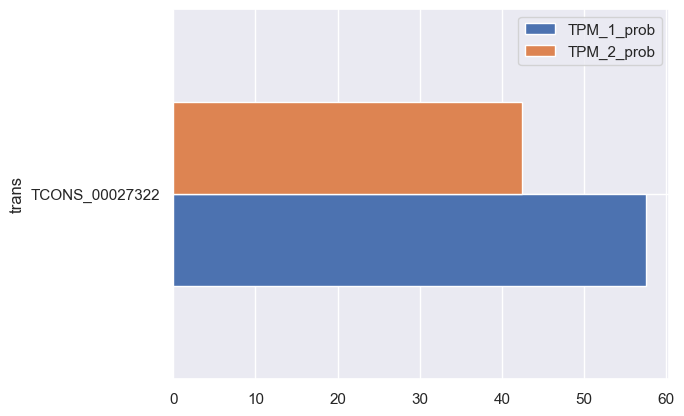

In [42]:
ax1 = by_transcript_prob.plot.barh()

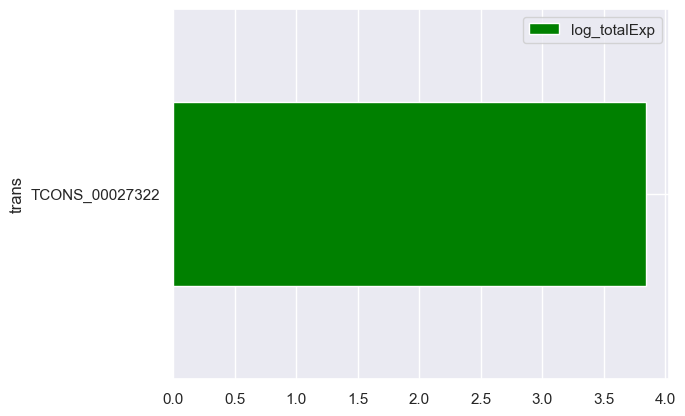

In [178]:
ax2 = by_transcript_totalExp.plot.barh(color="green")

In [179]:
by_transcript_prob

,ReadCount_1_prob,ReadCount_2_prob
trans,,
TCONS_00027322,57.509347,42.490653


In [180]:
import numpy as np
by_transcript_FC = pd.DataFrame(np.log10( (by_transcript_prob['ReadCount_1_prob'] + 1) / (by_transcript_prob['ReadCount_2_prob'] + 1)))
by_transcript_FC.columns = ['logFC']
by_transcript_FC = by_transcript_FC.reset_index()
by_transcript_FC['logFC'] = by_transcript_FC['logFC'].fillna(0)
by_transcript_FC.head(6)

,trans,logFC
0,TCONS_00027322,0.128829


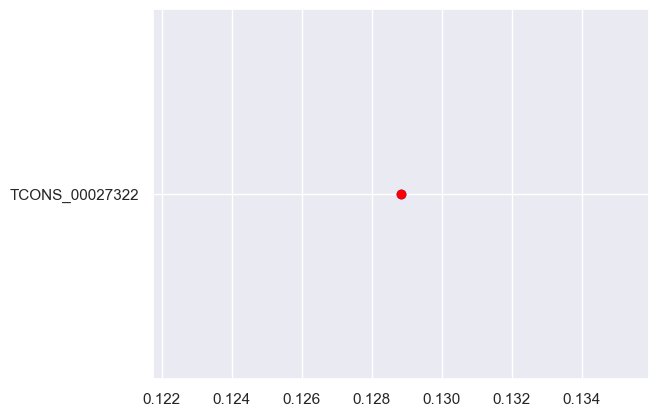

In [181]:
# Plotting
plt.scatter(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Data points', color='blue')
plt.plot(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Connected line', color='red', linestyle='-', marker='o')

In [182]:
by_transcript_FC['logFC']

0    0.128829
Name: logFC, dtype: float64

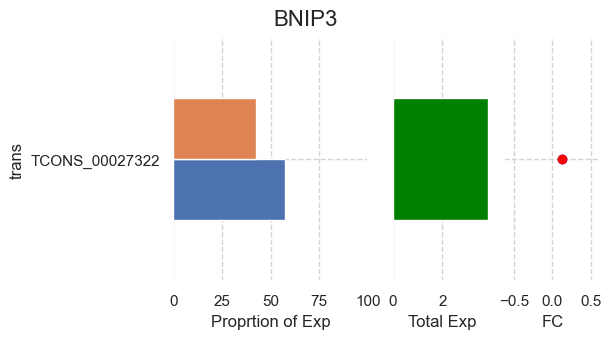

In [183]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a gridspec with one row and three columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(6, 3), frameon=False, constrained_layout=True, gridspec_kw={'width_ratios': [2, 1, 1]})

# Plot data on each subplot
by_transcript_prob.plot.barh(ax=ax1)
by_transcript_totalExp.plot.barh(ax=ax2, color = "green")

ax3.scatter(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Data points', color='blue')
ax3.plot(by_transcript_FC['logFC'], by_transcript_FC['trans'], label='Connected line', color='red', linestyle='-', marker='o')

# Set x-axis limits for each subplot
ax1.set_xlim(0, 100)
ax2.set_xlim(0, totalMAX)
ax3.set_xlim(-max(abs(by_transcript_FC['logFC']))-0.5, max(abs(by_transcript_FC['logFC']))+0.5)

# Set the background color of each subplot to white
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax3.set_facecolor('white')

# Set the background color of the figure to white
fig.set_facecolor('white')

# Set the grid color to light gray
ax1.grid(color='lightgray', linestyle='--')
ax2.grid(color='lightgray', linestyle='--')
ax3.grid(color='lightgray', linestyle='--')

# Add x-axis for each subplot
ax1.set_xlabel('Proprtion of Exp')
ax2.set_xlabel('Total Exp')
ax3.set_xlabel('FC')
ax3.set_ylabel('Transcripts')

fig.suptitle(gene_to_plt, fontsize=16, y=1.08)

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)


plt.show()


In [184]:
transName="/gpfs/gsfs11/users/kimj75/00.Files/references/hg002/hg002v101/fiberseq/geneTrans.name"
transName = pd.read_csv(transName, sep='\t', header=None)
transName.columns = ['trans','gene']
transName.head(7)

,trans,gene
0,TCONS_00000001,LOC124905335
1,TCONS_00000002,LINC01409
2,TCONS_00000003,LINC01409
3,TCONS_00000004,LOC124903817
4,TCONS_00000005,FAM87B
5,TCONS_00000006,LINC01128
6,TCONS_00000010,LINC01128


In [46]:
methyl_hst="/gpfs/gsfs11/users/kimj75/00.Files/references/hg002/hg002v101/fiberseq/FDR-wide-peaks.matToCHM13.hst.bed"
methyl_hst = pd.read_csv(methyl_hst, sep='\t', header=None)
methyl_hst.columns = ['CHM13_chr','CHM13_start','CHM13_End',
                     'trans','Gene1','CHM13_chr_ori','CHM13_start_ori','CHM13_End_ori',
                     'MAT']
methyl_hst.head(3)

,CHM13_chr,CHM13_start,CHM13_End,trans,Gene1,CHM13_chr_ori,CHM13_start_ori,CHM13_End_ori,MAT
0,chr1,154998370,155023314,transcript62227.chr1.nnic,XLOC_001499,chr1,154999432,154999607,chr1_MATERNAL:150697855-150698030
1,chr1,160132277,160158230,TCONS_00014993,XLOC_003870,chr1,160134481,160134651,chr1_MATERNAL:155830323-155830493
2,chr1,205949085,205998488,TCONS_00007762,XLOC_001993,chr1,205967984,205968201,chr1_MATERNAL:201600559-201600776


In [47]:
tab = methyl_hst.merge(transName, on = "trans")
tab= tab[['MAT','gene']]
tab.head(3)


,MAT,gene
0,chr1_MATERNAL:155830323-155830493,F11R
1,chr1_MATERNAL:201600559-201600776,MAPKAPK2
2,chr1_MATERNAL:201614101-201614324,MAPKAPK2


In [48]:
selected_rows.head(3)

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,FC,MAX_value
7634,TCONS_00019335_H1,TCONS_00019335_H2,114,1.0,1427.15130,408.16844,0.0,0.0,TCONS_00019335,FBH1,T,inf,1427.15130
4912,TCONS_00022257_H1,TCONS_00022257_H2,12,1.0,1082.46690,372.89102,0.0,0.0,TCONS_00022257,LZTS2,T,inf,1082.46690
8331,transcript19906.chr10.nic_H1,transcript19906.chr10.nic_H2,28,1.0,709.99839,172.74028,0.0,0.0,transcript19906.chr10.nic,NaN,T,inf,709.99839


In [49]:
selected_rows_wGene = tab.merge(selected_rows, on="gene", how="right")
selected_rows_wGene.head(3)

,MAT,gene,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,max,FC,MAX_value
0,chr10_MATERNAL:5895266-5895422,FBH1,TCONS_00019335_H1,TCONS_00019335_H2,114,1.0,1427.1513,408.16844,0.0,0.0,TCONS_00019335,T,inf,1427.1513
1,chr10_MATERNAL:5895266-5895422,FBH1,TCONS_00019335_H1,TCONS_00019335_H2,114,1.0,1427.1513,408.16844,0.0,0.0,TCONS_00019335,T,inf,1427.1513
2,chr10_MATERNAL:5895266-5895422,FBH1,TCONS_00019335_H1,TCONS_00019335_H2,114,1.0,1427.1513,408.16844,0.0,0.0,TCONS_00019335,T,inf,1427.1513


In [50]:
from io import StringIO
selected_rows_wGene = selected_rows_wGene[selected_rows_wGene['MAT'].notna()]
selected_rows_wGene.groupby('gene')['MAT'].apply(lambda x: ','.join(x)).reset_index()

,gene,MAT
0,ADK,"chr10_MATERNAL:76276354-76276516,chr10_MATERNA..."
1,ASB13,chr10_MATERNAL:5656621-5656899
2,ASCC1,"chr10_MATERNAL:74105754-74105877,chr10_MATERNA..."
3,CERS6,chr2_MATERNAL:168374687-168374917
4,CHST15,"chr10_MATERNAL:126072675-126072827,chr10_MATER..."
5,DDX11-AS1,chr12_MATERNAL:30928100-30928268
6,DNAJB12,"chr10_MATERNAL:74307702-74307858,chr10_MATERNA..."
7,ESYT2,"chr7_MATERNAL:160375686-160375902,chr7_MATERNA..."
8,F11R,chr1_MATERNAL:155830323-155830493
9,FAM167A,"chr8_MATERNAL:11013234-11013463,chr8_MATERNAL:..."


## Integration with methylation

In [150]:
hsm = pd.read_table("/gpfs/gsfs11/users/kimj75/00.Files/references/hg002/hg002v101/curated/mat_pat_merged/HSM.geneName", header=None)
hsm= hsm[0].tolist()
hsm = [string.replace("_chm13", "") for string in hsm]
hsm[0:6]

['ACAP1', 'ACTL10', 'ADGRA2', 'ALPP', 'ANKRD23', 'ANO8']

In [151]:
len(hsm)

242

In [152]:
rpvg_gene['tpm_sd']= np.std(rpvg_gene[['TPM_1', 'TPM_2']], axis=1)

In [153]:
import pandas as pd

# Assuming rpvg_gene is your DataFrame

# Define a function to calculate the expression per row
def calculate_expression(row):
    max_tpm_1 = max(row['ReadCount_1'],row['ReadCount_2'])
    min_tpm_1 = min(row['ReadCount_1'],row['ReadCount_2'])
    if max_tpm_1 == 0:
        return 0  # Avoid division by zero
    else:
        return max_tpm_1 / (max_tpm_1 + min_tpm_1)

# Apply the function to each row
rpvg_gene['Expression'] = rpvg_gene.apply(lambda row: calculate_expression(row), axis=1)

# Print the DataFrame with the added 'Expression' column
rpvg_gene.head(6)


,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,tpm_sd,Expression
0,TCONS_00020747_R1,TCONS_00020747_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020747,WASHC2A,T,0.000000,0.000000
1,transcript12583.chr10.nic_R1,transcript12583.chr10.nic_H1,20,1.0,400.482380,50.293997,233.34355,29.312355,transcript12583.chr10.nic,NaN,T,10.490821,0.631849
2,TCONS_00020735_R1,TCONS_00020735_H1,20,1.0,14.922362,6.534654,0.00000,0.000000,TCONS_00020735,WASHC2A,T,3.267327,1.000000
3,TCONS_00020751_R1,TCONS_00020751_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020751,WASHC2A,T,0.000000,0.000000
4,TCONS_00020739_R1,TCONS_00020739_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020739,WASHC2A,T,0.000000,0.000000
5,TCONS_00020741_R1,TCONS_00020741_H1,20,1.0,0.000000,0.000000,0.00000,0.000000,TCONS_00020741,WASHC2A,T,0.000000,0.000000


In [170]:
rpvg_gene[(rpvg_gene['gene'].isin(hsm)) & (rpvg_gene['max']=="T") & (rpvg_gene['Expression'] > 0.5)]

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,tpm_sd,Expression
2906,TCONS_00182899_R1,TCONS_00182899_H1,183,1.000000,50.397687,4.440940,16.911135,1.552533,TCONS_00182899,TRAPPC9,T,1.444204,0.748753
2907,TCONS_00182900_R1,TCONS_00182900_H1,183,1.000000,50.852348,4.481446,17.070113,1.567289,TCONS_00182900,TRAPPC9,T,1.457079,0.748682
3976,TCONS_00091909_R1,TCONS_00091909_H1,2225,0.490727,0.721252,0.295009,0.000000,0.000000,TCONS_00091909,DDA1,T,0.147505,1.000000
3980,TCONS_00091910_R1,TCONS_00091910_H1,2225,0.490727,0.750928,0.307288,0.000000,0.000000,TCONS_00091910,DDA1,T,0.153644,1.000000
5387,TCONS_00027322_R1,TCONS_00027322_H1,13,1.000000,5662.000100,3974.522600,4183.356200,2936.567100,TCONS_00027322,BNIP3,T,518.977750,0.575093
8320,TCONS_00170001_R1,TCONS_00170001_H1,2462,0.216391,0.216391,0.068956,0.000000,0.000000,TCONS_00170001,SLC12A9,T,0.034478,1.000000


In [190]:
rpvg_gene['fc'] = (rpvg_gene['TPM_1']+0.00001)/(rpvg_gene['TPM_2']+.00001)

In [192]:
rpvg_gene[(rpvg_gene['gene'].isin(hsm)) & (rpvg_gene['max']=="T")]

,Name_1,Name_2,ClusterID,HaplotypingProbability,ReadCount_1,TPM_1,ReadCount_2,TPM_2,trans,gene,max,tpm_sd,Expression,fc
2906,TCONS_00182899_R1,TCONS_00182899_H1,183,1.000000,50.397687,4.440940,16.911135,1.552533,TCONS_00182899,TRAPPC9,T,1.444204,0.748753,2.860436
2907,TCONS_00182900_R1,TCONS_00182900_H1,183,1.000000,50.852348,4.481446,17.070113,1.567289,TCONS_00182900,TRAPPC9,T,1.457079,0.748682,2.859350
3976,TCONS_00091909_R1,TCONS_00091909_H1,2225,0.490727,0.721252,0.295009,0.000000,0.000000,TCONS_00091909,DDA1,T,0.147505,1.000000,29501.929000
3980,TCONS_00091910_R1,TCONS_00091910_H1,2225,0.490727,0.750928,0.307288,0.000000,0.000000,TCONS_00091910,DDA1,T,0.153644,1.000000,30729.810000
4832,TCONS_00007960_R1,TCONS_00007960_R1,2158,1.000000,3.000000,1.387207,3.000000,1.387207,TCONS_00007960,LINC00467,T,0.000000,0.500000,1.000000
5387,TCONS_00027322_R1,TCONS_00027322_H1,13,1.000000,5662.000100,3974.522600,4183.356200,2936.567100,TCONS_00027322,BNIP3,T,518.977750,0.575093,1.353459
6332,TCONS_00017375_R1,TCONS_00017375_H1,2121,0.500000,0.000000,0.000000,0.000000,0.000000,TCONS_00017375,ZNF124,T,0.000000,0.000000,1.000000
8230,TCONS_00144601_H1,TCONS_00144601_H1,1949,1.000000,2.500000,0.511749,2.500000,0.511749,TCONS_00144601,LINC00504,T,0.000000,0.500000,1.000000
8315,TCONS_00170002_R1,TCONS_00170002_H1,2462,0.216391,0.000000,0.000000,0.000000,0.000000,TCONS_00170002,SLC12A9,T,0.000000,0.000000,1.000000
8316,TCONS_00170005_R1,TCONS_00170005_H1,2462,0.216391,0.000000,0.000000,0.000000,0.000000,TCONS_00170005,SLC12A9,T,0.000000,0.000000,1.000000
